In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

In [2]:
f = open('Allcoords_META_2014-11-25_2020-11-24.clean', 'r')

lines = f.readlines()

f.close()

In [3]:
# Looking at the first line of the text file
print(lines[0])

RA_[deg], Dec_[deg], Duration_[s], YYYY-MM-DD, MJDstart, MJDend, filename, target, orig_src_name, project_code, priband, Baseline_MAX_[m], Baseline_MIN_[m], AZstart, ELstart, AZend, ELend_[deg], RA_tracking_rate_[rad/day], Dec_tracking_rate_[rad/day], Delay_center_epoch_[MJD], AZ_point_offset, EL_point_offset_[arcmin]



In [4]:
# Looking at the second line of the text file
print(lines[1])

346.236180  12.322810  474.0  2014-11-25  56986.030550  56986.036036  VLITE-2014-11-25T004355-0.META  NGC7479  NGC7479   14B-396  1.5GHz  3.387490e+03  1.699677e+02  137.008  62.222  140.514  63.304   0.000   0.000  None   0.000   0.000 



In [5]:
# Counting the number of receivers

receivers = set()

for line in lines[1:]:

    info = line.split('  ')
    rcvr = info[10]
    
    receivers.add(rcvr)

print('Number of receivers:', len(receivers))
print(receivers)

Number of receivers: 9
{'1.5GHz', '10GHz', '300MHz', '33GHz', '3GHz', '6GHz', '45GHz', '22GHz', '15GHz'}


In [6]:
# Turning the set into a list

lst = list(receivers)
print(lst)

['1.5GHz', '10GHz', '300MHz', '33GHz', '3GHz', '6GHz', '45GHz', '22GHz', '15GHz']


In [7]:
# Sorting the list manually

receivers = [lst[1], lst[2], lst[4], lst[7], lst[3], lst[5], lst[0], lst[8], lst[6]]
print(receivers)

['10GHz', '300MHz', '3GHz', '22GHz', '33GHz', '6GHz', '1.5GHz', '15GHz', '45GHz']


In [8]:
d = {}
for y in range(2014, 2021):
    d[y] = []

check = {}
for y in range(2014, 2021):
    check[y] = set()

In [9]:
# Examine one line at a time
for line in lines[1:]:
    
    info = line.split('  ')

    # Info needed in each line: which receiver, target name, date
    year = int(info[3].split('-')[0])
    start = float(info[4])
    target = info[7]
    duration = float(info[2])
    rcvr = info[10]
    
    duplicate = False
    if (rcvr + target) in check[year]:
        duplicate = True
    
    d[year].append([start, duration, rcvr, target, duplicate])
    check[year].add(rcvr + target)

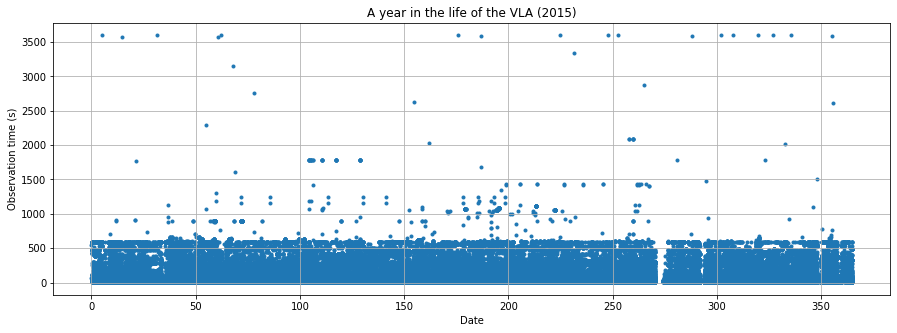

In [11]:
dates = []
times = []

for obs in d[2015]:
    dates.append(obs[0])
    times.append(obs[1])

dates = np.array(dates)
dates = dates - min(dates)
    
plt.scatter(dates, times, marker='.')

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2015)')

plt.gcf().set_size_inches(15, 5)
plt.rc('font', size=15)
plt.grid()
#plt.legend()
plt.show()

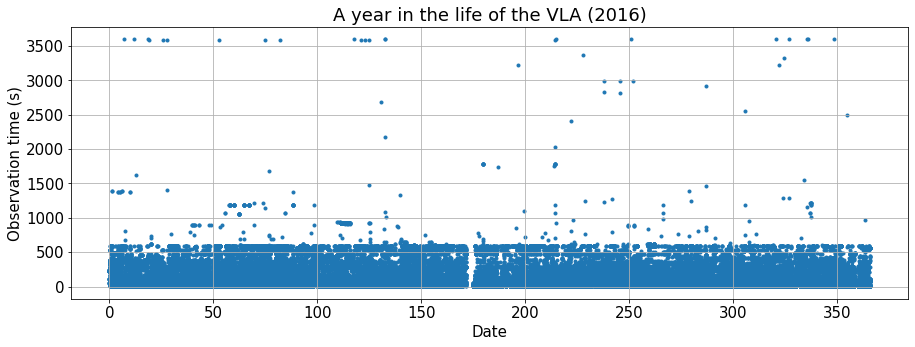

In [12]:
dates = []
times = []

for obs in d[2016]:
    dates.append(obs[0])
    times.append(obs[1])

dates = np.array(dates)
dates = dates - min(dates)
    
plt.scatter(dates, times, marker='.')

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2016)')

plt.gcf().set_size_inches(15, 5)
plt.rc('font', size=15)
plt.grid()
#plt.legend()
plt.show()

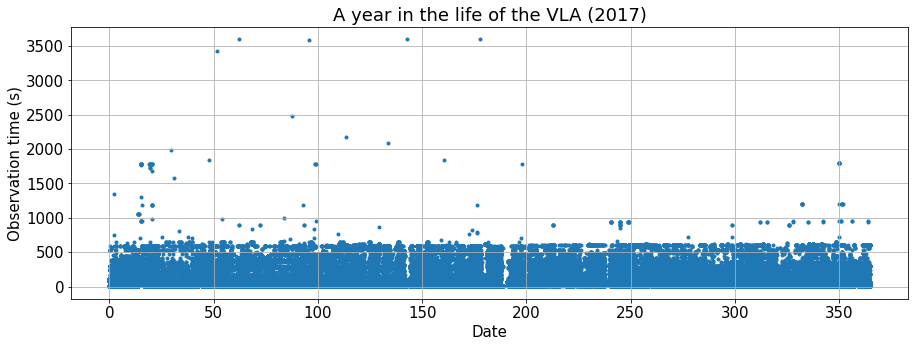

In [13]:
dates = []
times = []

for obs in d[2017]:
    dates.append(obs[0])
    times.append(obs[1])

dates = np.array(dates)
dates = dates - min(dates)
    
plt.scatter(dates, times, marker='.')

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2017)')

plt.gcf().set_size_inches(15, 5)
plt.rc('font', size=15)
plt.grid()
#plt.legend()
plt.show()

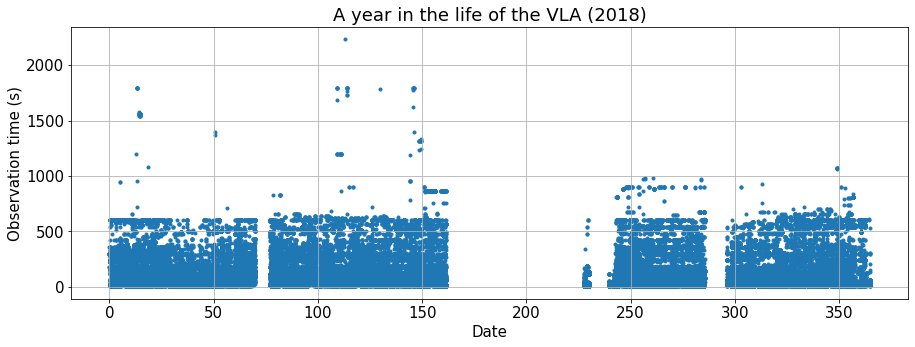

In [14]:
dates = []
times = []

for obs in d[2018]:
    dates.append(obs[0])
    times.append(obs[1])

dates = np.array(dates)
dates = dates - min(dates)
    
plt.scatter(dates, times, marker='.')

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2018)')

plt.gcf().set_size_inches(15, 5)
plt.rc('font', size=15)
plt.grid()
#plt.legend()
plt.show()

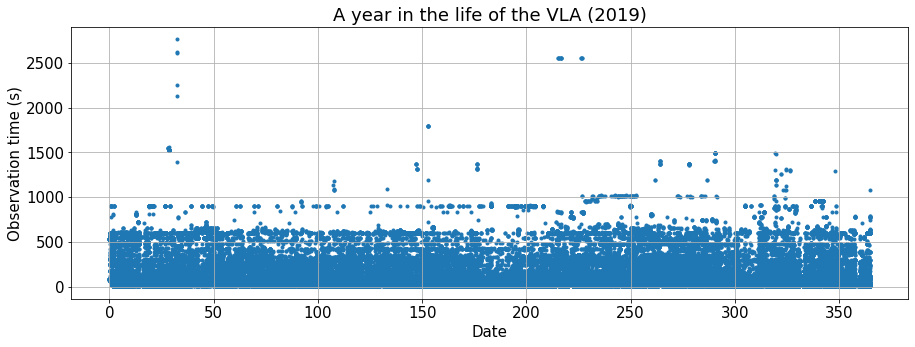

In [15]:
dates = []
times = []

for obs in d[2019]:
    dates.append(obs[0])
    times.append(obs[1])

dates = np.array(dates)
dates = dates - min(dates)
    
plt.scatter(dates, times, marker='.')

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2019)')

plt.gcf().set_size_inches(15, 5)
plt.rc('font', size=15)
plt.grid()
#plt.legend()
plt.show()

In [16]:
max(dates)

364.9933680000031

In [17]:
color_list = ['red', 'blue', 'green', 'black', 'fuchsia', 'gold', 'orange', 'brown', 'cyan']

color_dict = {}
for i, rcvr in enumerate(receivers):
    color_dict[rcvr] = color_list[i]

rcvr_plot = {}
for rcvr in receivers:
    rcvr_plot[rcvr] = [[[], [], 'x', color_dict[rcvr]], [[], [], '.', color_dict[rcvr]]]

for obs in d[2015]:
    if obs[4]:
        rcvr_plot[obs[2]][1][0].append(obs[0])
        rcvr_plot[obs[2]][1][1].append(obs[1])
    else:
        rcvr_plot[obs[2]][0][0].append(obs[0])
        rcvr_plot[obs[2]][0][1].append(obs[1])

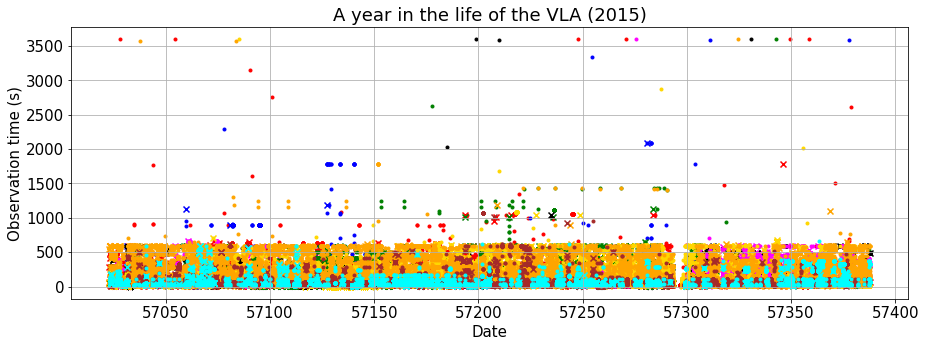

In [18]:
for rcvr in receivers:
    p = rcvr_plot[rcvr][0]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3], label=rcvr[:-3] + '-' + rcvr[-3:] + ' receiver')
    p = rcvr_plot[rcvr][1]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3])

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2015)')

plt.gcf().set_size_inches(15, 5)
plt.rc('font', size=15)
plt.grid()
#plt.legend()
plt.show()

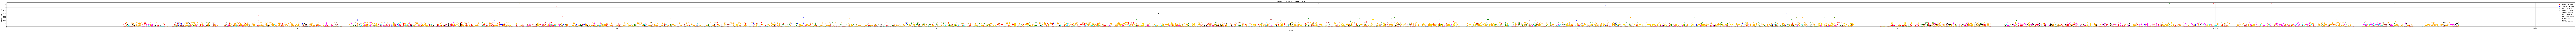

In [19]:
for rcvr in receivers:
    p = rcvr_plot[rcvr][0]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3], label=rcvr[:-3] + '-' + rcvr[-3:] + ' receiver')
    p = rcvr_plot[rcvr][1]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3])

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2015)')

plt.gcf().set_size_inches(500, 5)
plt.rc('font', size=15)
plt.grid()
plt.legend()
plt.show()

In [20]:
color_list = ['red', 'blue', 'green', 'black', 'fuchsia', 'gold', 'orange', 'brown', 'cyan']

color_dict = {}
for i, rcvr in enumerate(receivers):
    color_dict[rcvr] = color_list[i]

rcvr_plot = {}
for rcvr in receivers:
    rcvr_plot[rcvr] = [[[], [], 'x', color_dict[rcvr]], [[], [], '.', color_dict[rcvr]]]

for obs in d[2016]:
    if obs[4]:
        rcvr_plot[obs[2]][1][0].append(obs[0])
        rcvr_plot[obs[2]][1][1].append(obs[1])
    else:
        rcvr_plot[obs[2]][0][0].append(obs[0])
        rcvr_plot[obs[2]][0][1].append(obs[1])

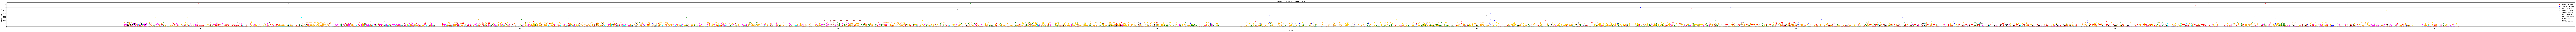

In [21]:
for rcvr in receivers:
    p = rcvr_plot[rcvr][0]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3], label=rcvr[:-3] + '-' + rcvr[-3:] + ' receiver')
    p = rcvr_plot[rcvr][1]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3])

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2016)')

plt.gcf().set_size_inches(500, 5)
plt.rc('font', size=15)
plt.grid()
plt.legend()
plt.show()

In [22]:
color_list = ['red', 'blue', 'green', 'black', 'fuchsia', 'gold', 'orange', 'brown', 'cyan']

color_dict = {}
for i, rcvr in enumerate(receivers):
    color_dict[rcvr] = color_list[i]

rcvr_plot = {}
for rcvr in receivers:
    rcvr_plot[rcvr] = [[[], [], 'x', color_dict[rcvr]], [[], [], '.', color_dict[rcvr]]]

for obs in d[2017]:
    if obs[4]:
        rcvr_plot[obs[2]][1][0].append(obs[0])
        rcvr_plot[obs[2]][1][1].append(obs[1])
    else:
        rcvr_plot[obs[2]][0][0].append(obs[0])
        rcvr_plot[obs[2]][0][1].append(obs[1])

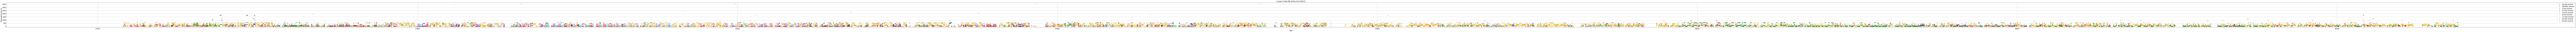

In [23]:
for rcvr in receivers:
    p = rcvr_plot[rcvr][0]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3], label=rcvr[:-3] + '-' + rcvr[-3:] + ' receiver')
    p = rcvr_plot[rcvr][1]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3])

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2017)')

plt.gcf().set_size_inches(500, 5)
plt.rc('font', size=15)
plt.grid()
plt.legend()
plt.show()

In [24]:
color_list = ['red', 'blue', 'green', 'black', 'fuchsia', 'gold', 'orange', 'brown', 'cyan']

color_dict = {}
for i, rcvr in enumerate(receivers):
    color_dict[rcvr] = color_list[i]

rcvr_plot = {}
for rcvr in receivers:
    rcvr_plot[rcvr] = [[[], [], 'x', color_dict[rcvr]], [[], [], '.', color_dict[rcvr]]]

for obs in d[2018]:
    if obs[4]:
        rcvr_plot[obs[2]][1][0].append(obs[0])
        rcvr_plot[obs[2]][1][1].append(obs[1])
    else:
        rcvr_plot[obs[2]][0][0].append(obs[0])
        rcvr_plot[obs[2]][0][1].append(obs[1])

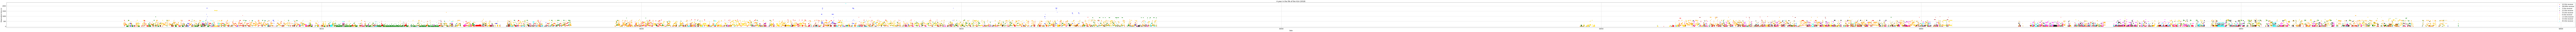

In [25]:
for rcvr in receivers:
    p = rcvr_plot[rcvr][0]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3], label=rcvr[:-3] + '-' + rcvr[-3:] + ' receiver')
    p = rcvr_plot[rcvr][1]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3])

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2018)')

plt.gcf().set_size_inches(500, 5)
plt.rc('font', size=15)
plt.grid()
plt.legend()
plt.show()

In [26]:
color_list = ['red', 'blue', 'green', 'black', 'fuchsia', 'gold', 'orange', 'brown', 'cyan']

color_dict = {}
for i, rcvr in enumerate(receivers):
    color_dict[rcvr] = color_list[i]

rcvr_plot = {}
for rcvr in receivers:
    rcvr_plot[rcvr] = [[[], [], 'x', color_dict[rcvr]], [[], [], '.', color_dict[rcvr]]]

for obs in d[2019]:
    if obs[4]:
        rcvr_plot[obs[2]][1][0].append(obs[0])
        rcvr_plot[obs[2]][1][1].append(obs[1])
    else:
        rcvr_plot[obs[2]][0][0].append(obs[0])
        rcvr_plot[obs[2]][0][1].append(obs[1])

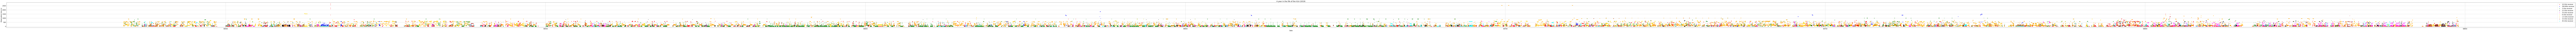

In [27]:
for rcvr in receivers:
    p = rcvr_plot[rcvr][0]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3], label=rcvr[:-3] + '-' + rcvr[-3:] + ' receiver')
    p = rcvr_plot[rcvr][1]
    plt.scatter(p[0], p[1], marker=p[2], color=p[3])

plt.xlabel('Date')
plt.ylabel('Observation time (s)')
plt.title('A year in the life of the VLA (2019)')

plt.gcf().set_size_inches(500, 5)
plt.rc('font', size=15)
plt.grid()
plt.legend()
plt.show()

In [28]:
usage = {}
for rcvr in receivers:
    usage[rcvr] = 0

for obs in d[2015]:
    usage[obs[2]] += obs[1]

usage_list = []
for rcvr in receivers:
    usage_list.append(usage[rcvr])

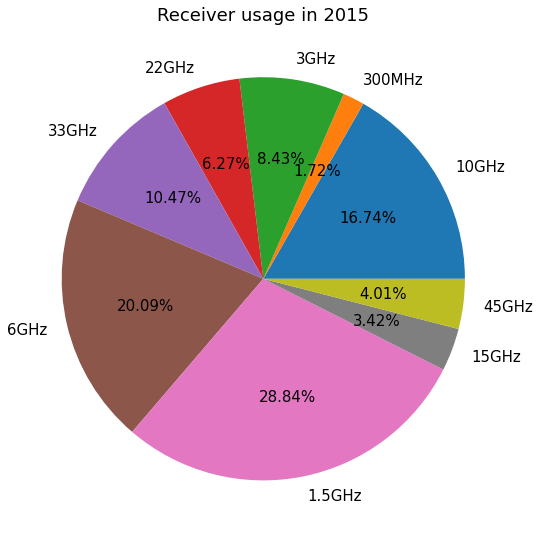

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')


ax.pie(usage_list, labels=receivers, autopct='%1.2f%%')

plt.title('Receiver usage in 2015')
plt.gcf().set_size_inches(7, 7)
plt.rc('font', size=12)
plt.show()

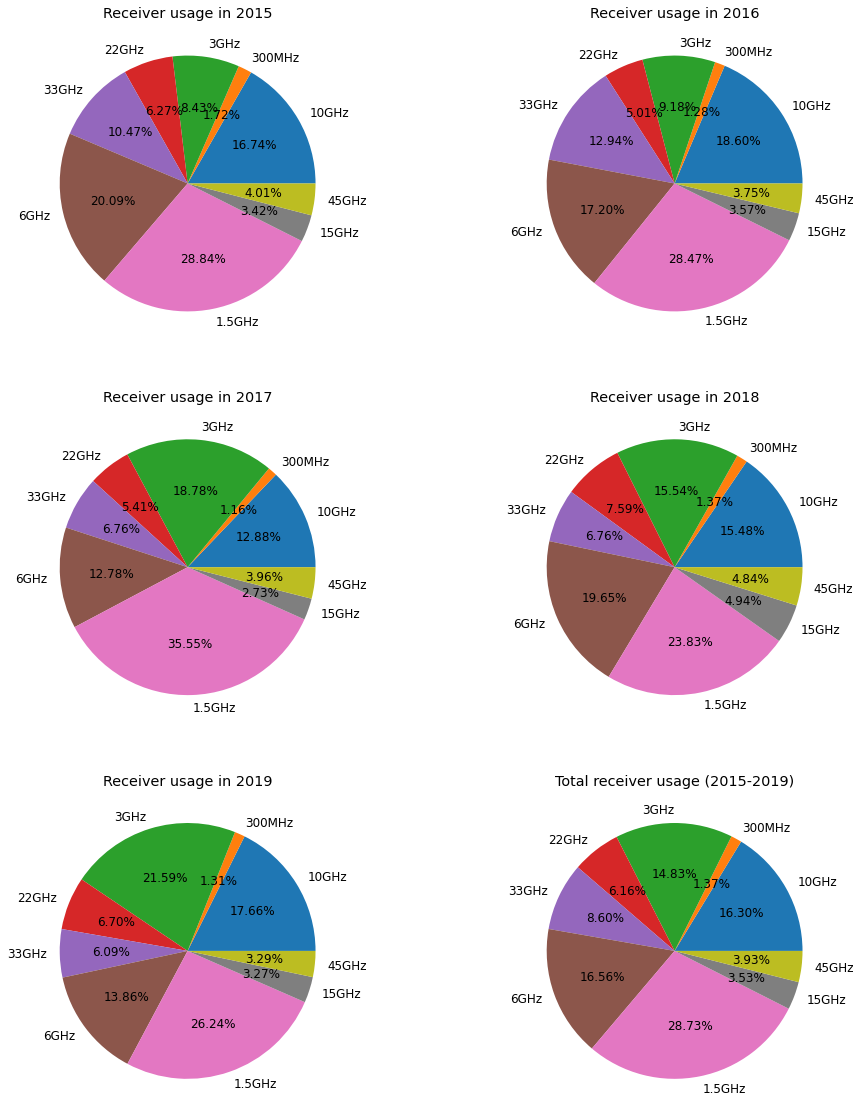

In [30]:
plt.subplot(3, 2, 1)

usage = {}
for rcvr in receivers:
    usage[rcvr] = 0

for obs in d[2015]:
    usage[obs[2]] += obs[1]

usage_list = []
for rcvr in receivers:
    usage_list.append(usage[rcvr])

plt.pie(usage_list, labels=receivers, autopct='%1.2f%%')
plt.title('Receiver usage in 2015')


plt.subplot(3, 2, 2)

usage = {}
for rcvr in receivers:
    usage[rcvr] = 0

for obs in d[2016]:
    usage[obs[2]] += obs[1]

usage_list = []
for rcvr in receivers:
    usage_list.append(usage[rcvr])

plt.pie(usage_list, labels=receivers, autopct='%1.2f%%')
plt.title('Receiver usage in 2016')


plt.subplot(3, 2, 3)

usage = {}
for rcvr in receivers:
    usage[rcvr] = 0

for obs in d[2017]:
    usage[obs[2]] += obs[1]

usage_list = []
for rcvr in receivers:
    usage_list.append(usage[rcvr])

plt.pie(usage_list, labels=receivers, autopct='%1.2f%%')
plt.title('Receiver usage in 2017')


plt.subplot(3, 2, 4)

usage = {}
for rcvr in receivers:
    usage[rcvr] = 0

for obs in d[2018]:
    usage[obs[2]] += obs[1]

usage_list = []
for rcvr in receivers:
    usage_list.append(usage[rcvr])

plt.pie(usage_list, labels=receivers, autopct='%1.2f%%')
plt.title('Receiver usage in 2018')


plt.subplot(3, 2, 5)

usage = {}
for rcvr in receivers:
    usage[rcvr] = 0

for obs in d[2019]:
    usage[obs[2]] += obs[1]

usage_list = []
for rcvr in receivers:
    usage_list.append(usage[rcvr])

plt.pie(usage_list, labels=receivers, autopct='%1.2f%%')
plt.title('Receiver usage in 2019')


plt.subplot(3, 2, 6)

usage = {}
for rcvr in receivers:
    usage[rcvr] = 0

for y in np.arange(2015, 2020):
    for obs in d[y]:
        usage[obs[2]] += obs[1]

usage_list = []
for rcvr in receivers:
    usage_list.append(usage[rcvr])

plt.pie(usage_list, labels=receivers, autopct='%1.2f%%')
plt.title('Total receiver usage (2015-2019)')


plt.gcf().set_size_inches(16, 20)
plt.rc('font', size=12)
plt.show()

In [32]:
y = 2015
rcvr = '1.5GHz'

time_per_target = {}

for obs in d[y]:
    if obs[2] == rcvr:
        if obs[3] not in time_per_target:
            time_per_target[obs[3]] = obs[1]/3600
        else:
            time_per_target[obs[3]] += obs[1]/3600

In [34]:
for target in time_per_target:
    if time_per_target[target] > 140:
        print(target)

deepfield


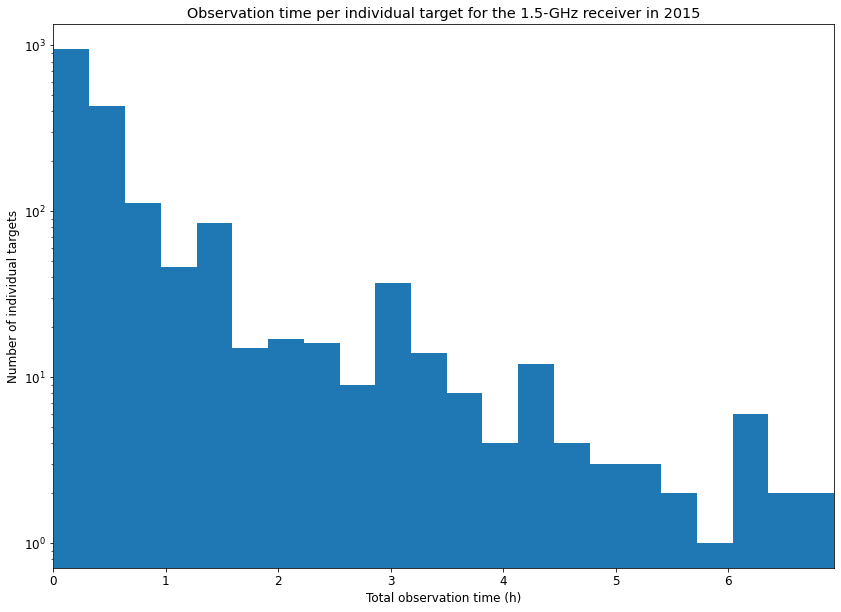

In [35]:
plt.hist(time_per_target.values(), log=True, bins=500)

plt.xlabel('Total observation time (h)')
plt.ylabel('Number of individual targets')
plt.title('Observation time per individual target for the ' + rcvr[:-3] + '-' + rcvr[-3:] + ' receiver in ' 
          + str(y))

plt.xlim(0, 25000/3600)

plt.gcf().set_size_inches(14, 10)
plt.rc('font', size=14)
plt.show()

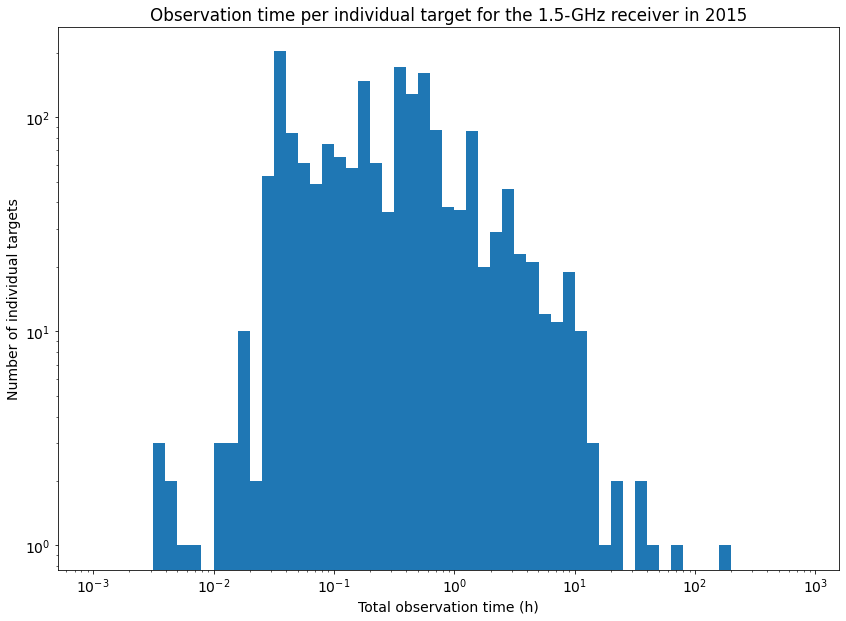

In [36]:
bins = 10 ** (np.arange(-3, 3, 0.1))

plt.hist(time_per_target.values(), log=True, bins=bins)

plt.xlabel('Total observation time (h)')
plt.ylabel('Number of individual targets')
plt.title('Observation time per individual target for the ' + rcvr[:-3] + '-' + rcvr[-3:] + ' receiver in ' 
          + str(y))

plt.xscale('log')
#plt.xlim(0, 25000/3600)

plt.gcf().set_size_inches(14, 10)
plt.rc('font', size=14)
plt.show()

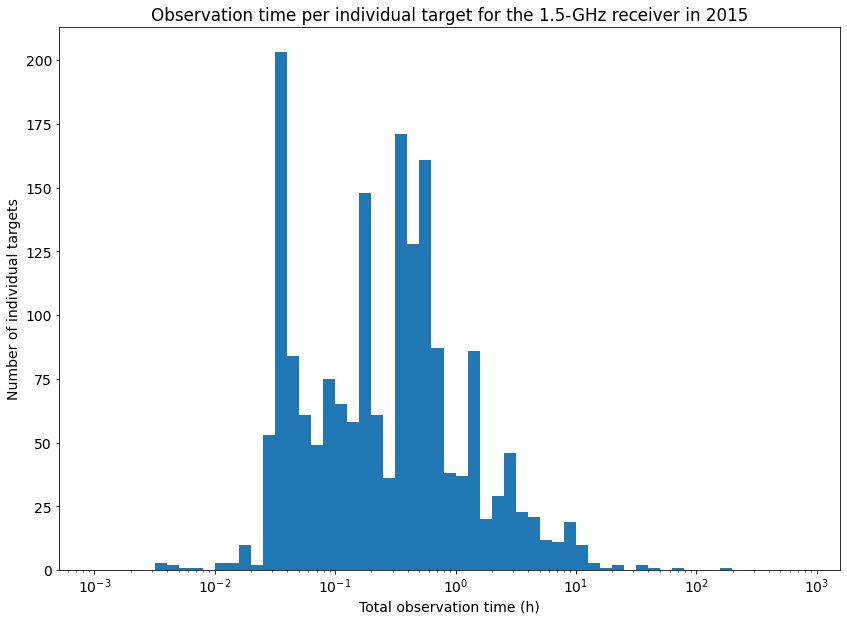

In [37]:
bins = 10 ** (np.arange(-3, 3, 0.1))

plt.hist(time_per_target.values(), log=False, bins=bins)

plt.xlabel('Total observation time (h)')
plt.ylabel('Number of individual targets')
plt.title('Observation time per individual target for the ' + rcvr[:-3] + '-' + rcvr[-3:] + ' receiver in ' 
          + str(y))

plt.xscale('log')
#plt.xlim(0, 25000/3600)

plt.gcf().set_size_inches(14, 10)
plt.rc('font', size=14)
plt.show()

In [38]:
n = np.log(np.arange(1, 100))

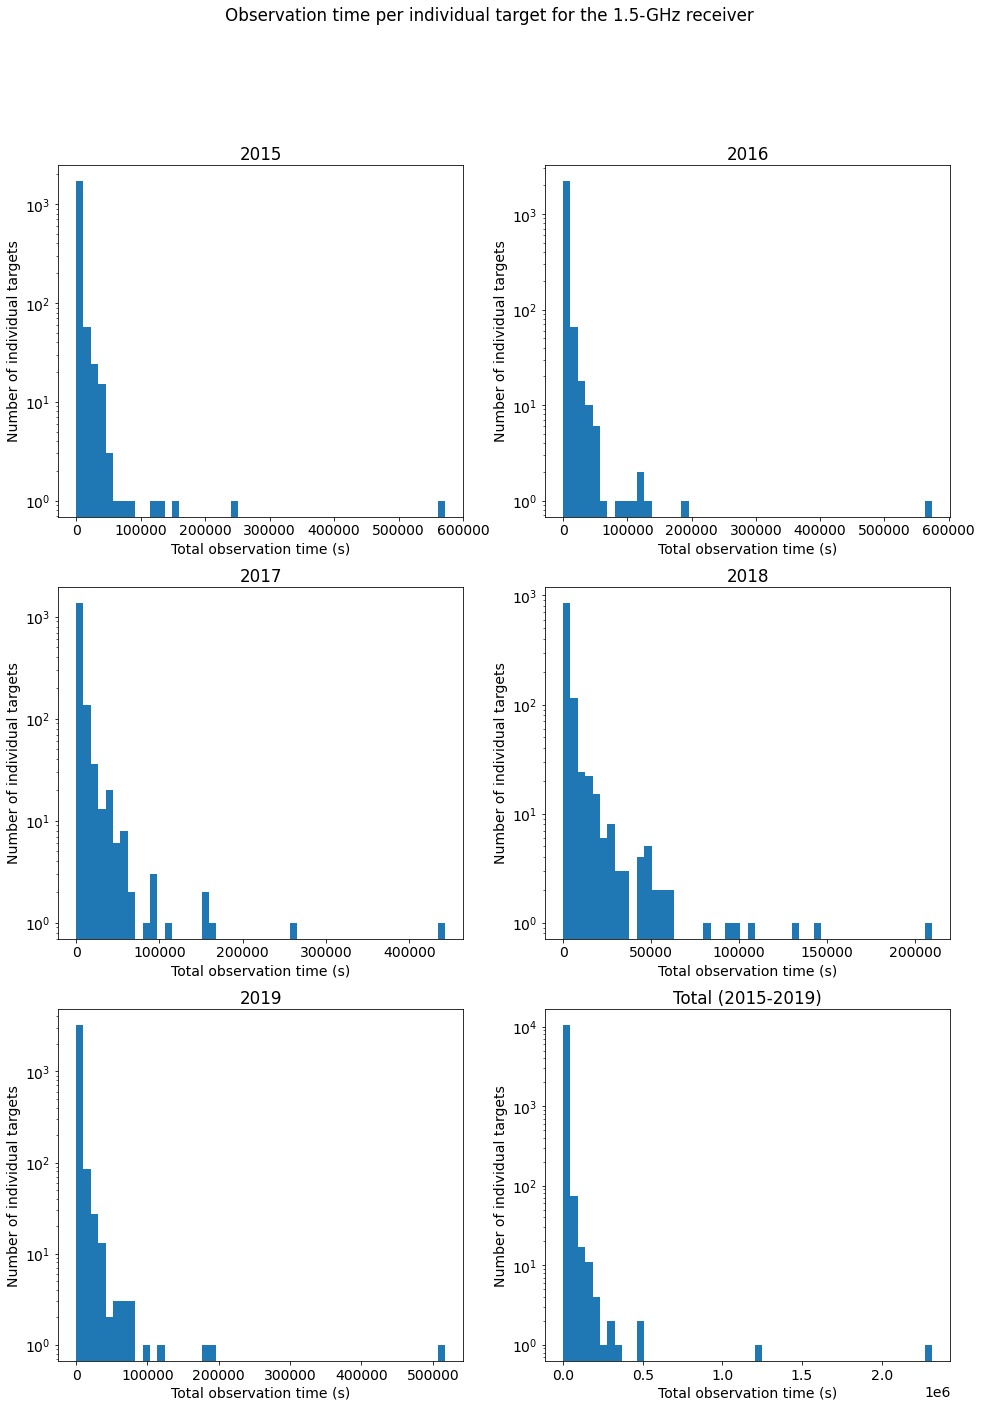

In [40]:
rcvr = '1.5GHz'

for i, y in enumerate(np.arange(2015, 2020)):

    plt.subplot(3, 2, i + 1)

    time_per_target = {}

    for obs in d[y]:
        if obs[2] == rcvr:
            if obs[3] not in time_per_target:
                time_per_target[obs[3]] = obs[1]
            else:
                time_per_target[obs[3]] += obs[1]

    plt.hist(time_per_target.values(), log=True, bins=50)

    plt.xlabel('Total observation time (s)')
    plt.ylabel('Number of individual targets')
    plt.title(str(y))


plt.subplot(3, 2, 6)

time_per_target = {}
for y in d:
    for obs in d[y]:
        if obs[2] == rcvr:
            if obs[3] not in time_per_target:
                time_per_target[obs[3]] = obs[1]
            else:
                time_per_target[obs[3]] += obs[1]

plt.hist(time_per_target.values(), log=True, bins=50)

plt.xlabel('Total observation time (s)')
plt.ylabel('Number of individual targets')
plt.title('Total (2015-2019)')

plt.suptitle('Observation time per individual target for the ' + rcvr[:-3] + '-' + rcvr[-3:] + ' receiver')
plt.gcf().set_size_inches(16, 22)
plt.rc('font', size=14)
plt.show()

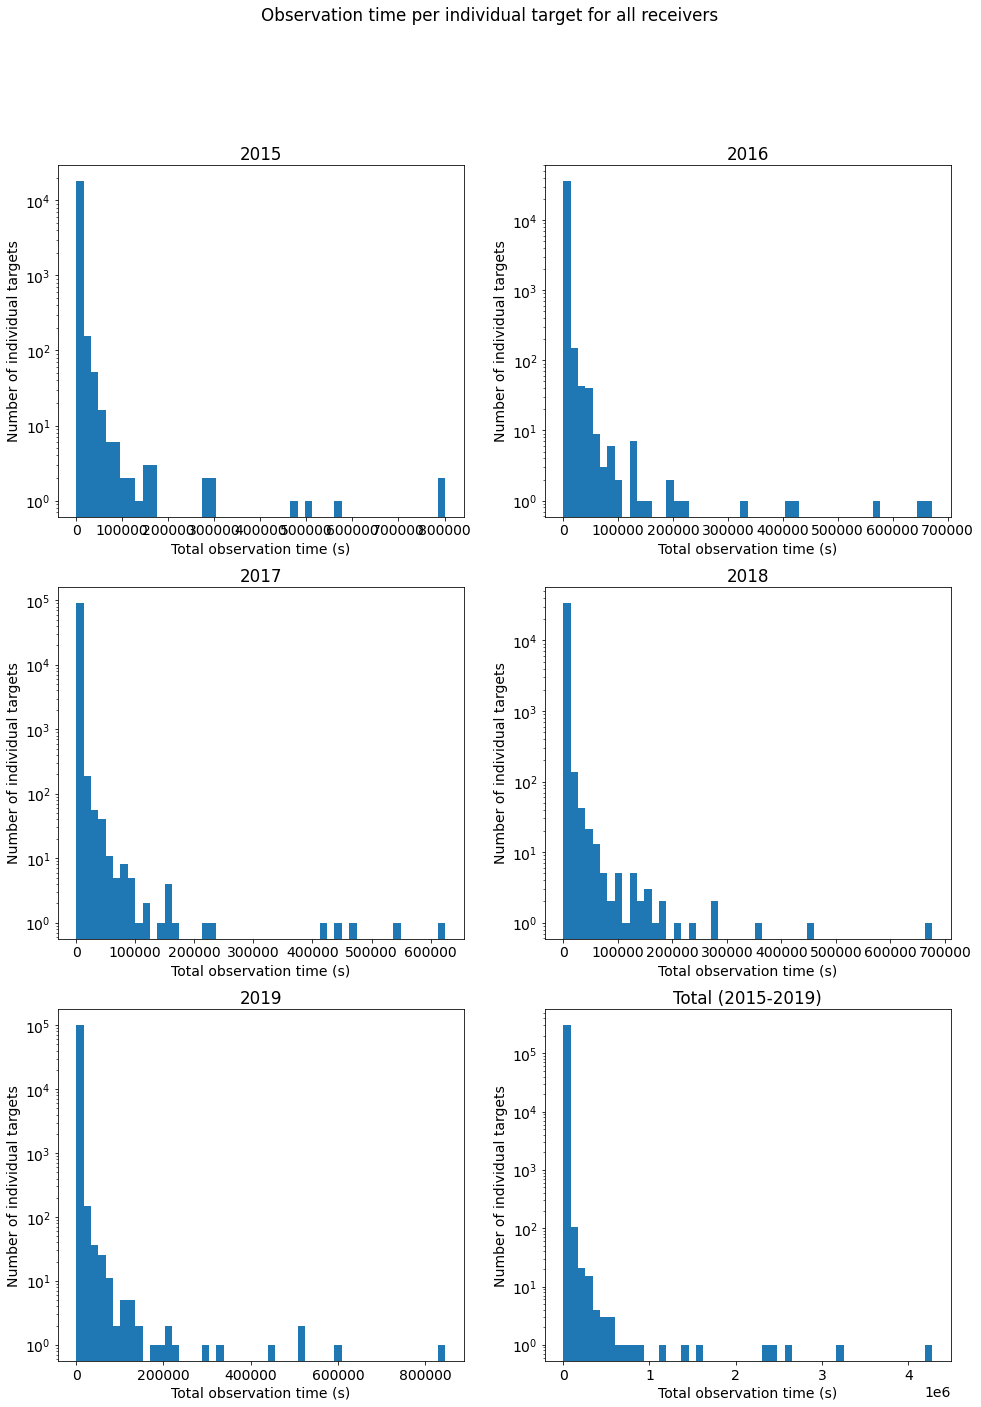

In [41]:
for i, y in enumerate(np.arange(2015, 2020)):

    plt.subplot(3, 2, i + 1)

    time_per_target = {}

    for obs in d[y]:
        if obs[3] not in time_per_target:
            time_per_target[obs[3]] = obs[1]
        else:
            time_per_target[obs[3]] += obs[1]

    plt.hist(time_per_target.values(), log=True, bins=50)

    plt.xlabel('Total observation time (s)')
    plt.ylabel('Number of individual targets')
    plt.title(str(y))


plt.subplot(3, 2, 6)

time_per_target = {}
for y in d:
    for obs in d[y]:
        if obs[3] not in time_per_target:
            time_per_target[obs[3]] = obs[1]
        else:
            time_per_target[obs[3]] += obs[1]

plt.hist(time_per_target.values(), log=True, bins=50)

plt.xlabel('Total observation time (s)')
plt.ylabel('Number of individual targets')
plt.title('Total (2015-2019)')

plt.suptitle('Observation time per individual target for all receivers')
plt.gcf().set_size_inches(16, 22)
plt.rc('font', size=12)
plt.show()

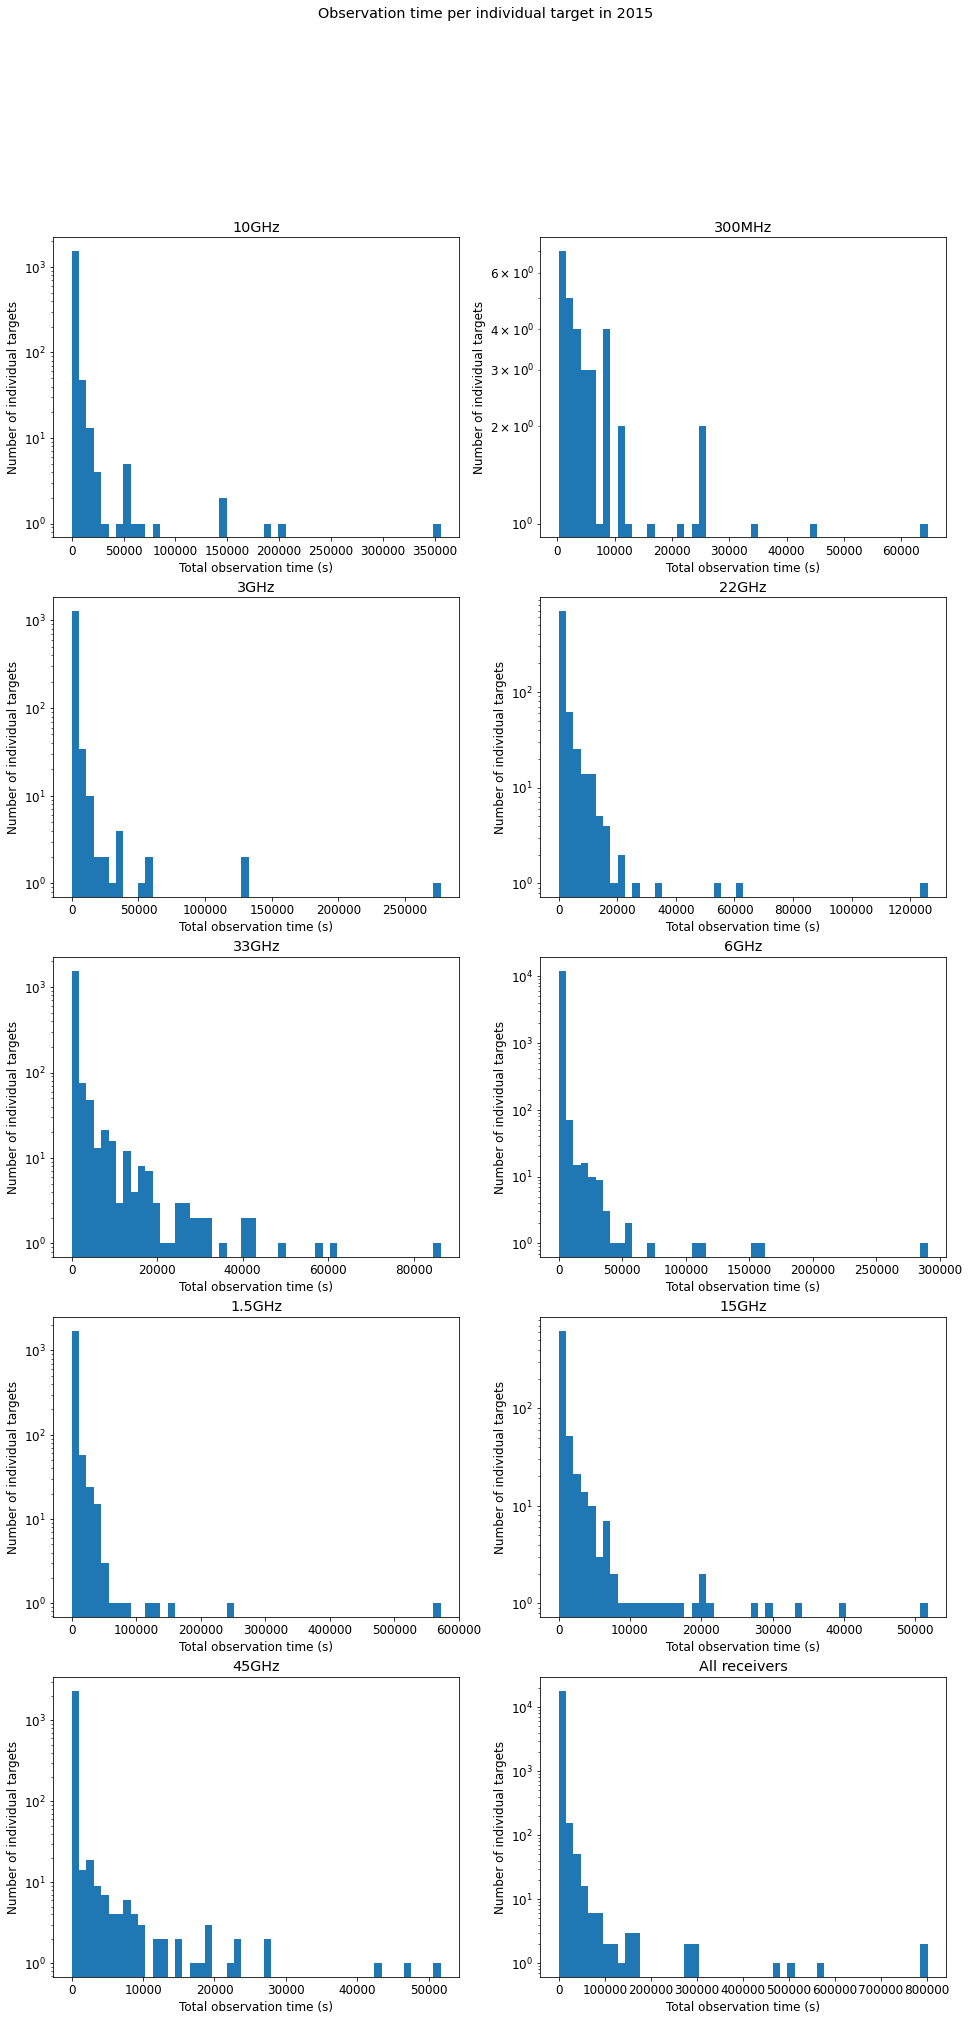

In [42]:
y = 2015

for i, rcvr in enumerate(receivers):

    plt.subplot(5, 2, i + 1)

    time_per_target = {}

    for obs in d[y]:
        if obs[2] == rcvr:
            if obs[3] not in time_per_target:
                time_per_target[obs[3]] = obs[1]
            else:
                time_per_target[obs[3]] += obs[1]

    plt.hist(time_per_target.values(), log=True, bins=50)

    plt.xlabel('Total observation time (s)')
    plt.ylabel('Number of individual targets')
    plt.title(rcvr)


plt.subplot(5, 2, 10)

time_per_target = {}

for obs in d[y]:
    if obs[3] not in time_per_target:
        time_per_target[obs[3]] = obs[1]
    else:
        time_per_target[obs[3]] += obs[1]

plt.hist(time_per_target.values(), log=True, bins=50)

plt.xlabel('Total observation time (s)')
plt.ylabel('Number of individual targets')
plt.title('All receivers')

plt.suptitle('Observation time per individual target in ' + str(y))
plt.gcf().set_size_inches(16, 32)
plt.rc('font', size=11)
plt.show()

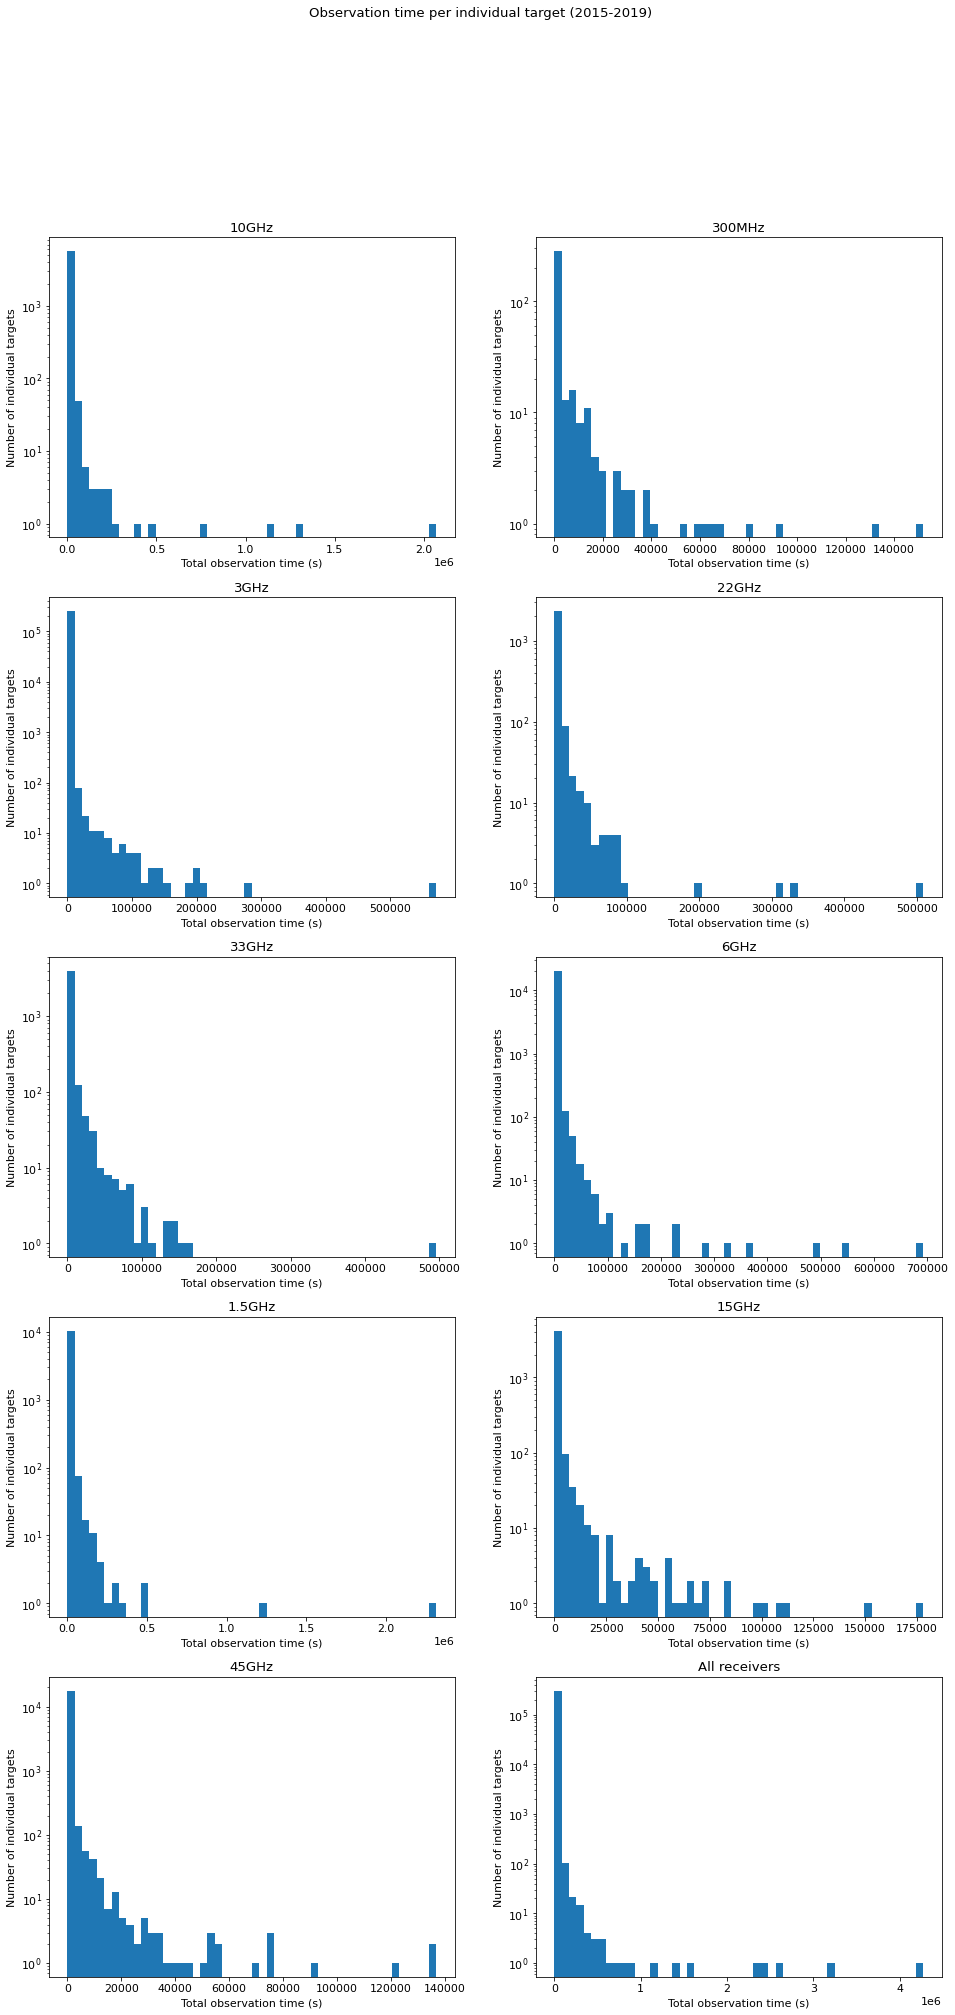

In [43]:
for i, rcvr in enumerate(receivers):

    plt.subplot(5, 2, i + 1)

    time_per_target = {}

    for y in d:
        for obs in d[y]:
            if obs[2] == rcvr:
                if obs[3] not in time_per_target:
                    time_per_target[obs[3]] = obs[1]
                else:
                    time_per_target[obs[3]] += obs[1]

    plt.hist(time_per_target.values(), log=True, bins=50)

    plt.xlabel('Total observation time (s)')
    plt.ylabel('Number of individual targets')
    plt.title(rcvr)


plt.subplot(5, 2, 10)

time_per_target = {}

for y in d:
    for obs in d[y]:
        if obs[3] not in time_per_target:
            time_per_target[obs[3]] = obs[1]
        else:
            time_per_target[obs[3]] += obs[1]

plt.hist(time_per_target.values(), log=True, bins=50)

plt.xlabel('Total observation time (s)')
plt.ylabel('Number of individual targets')
plt.title('All receivers')

plt.suptitle('Observation time per individual target (2015-2019)')
plt.gcf().set_size_inches(16, 32)
plt.rc('font', size=11)
plt.show()